In [72]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [73]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
from sklearn.datasets import make_classification

data = make_classification(n_samples = 10000, n_features = 8, n_informative = 5, class_sep = 2, random_state = 42)
df = pd.DataFrame(data[0])
df["target"] = data[1]
df

,0,1,2,3,4,5,6,7,target
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


In [74]:
# Check duplicate values and missing data.
print(sum(df.duplicated()))

df.isnull().sum()


0


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
target    0
dtype: int64

In [16]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[(df>Q1-1.5*IQR) & (df<Q3+1.5*IQR)].dropna()
df

0         3.241782
1         2.967446
2         1.354336
3         4.493215
4         3.037003
5         3.823207
6         3.970298
7         3.212087
target    1.000000
dtype: float64


,0,1,2,3,4,5,6,7,target
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


In [75]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size= 0.3, random_state=2 )


In [76]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier


for d in [3,4,5,6,7,8]:
    print("for max_depth = ",d,", the score: ",DecisionTreeClassifier(max_depth = d, random_state= 42).fit(train_X, train_y).score(test_X, test_y), sep="")
    
# Best max_depth seems to be 5
print("*"*50)
for m in [3,4,5,6,7,8,9]:
    print("for min_samples_leaf = ",m,", the score: ",DecisionTreeClassifier(max_depth = 5,min_samples_leaf = m
                                                , random_state= 41).fit(train_X, train_y).score(test_X, test_y), sep="")
    
# min_samples_leaf made a slight difference; however, it is preferable to choose 6 for this parameter.
model = DecisionTreeClassifier(max_depth =5, min_samples_leaf = 6, random_state =41)
model.fit(train_X,train_y)

for max_depth = 3, the score: 0.9443333333333334
for max_depth = 4, the score: 0.9626666666666667
for max_depth = 5, the score: 0.9646666666666667
for max_depth = 6, the score: 0.9686666666666667
for max_depth = 7, the score: 0.9703333333333334
for max_depth = 8, the score: 0.975
**************************************************
for min_samples_leaf = 3, the score: 0.963
for min_samples_leaf = 4, the score: 0.9646666666666667
for min_samples_leaf = 5, the score: 0.9646666666666667
for min_samples_leaf = 6, the score: 0.9646666666666667
for min_samples_leaf = 7, the score: 0.9646666666666667
for min_samples_leaf = 8, the score: 0.9646666666666667
for min_samples_leaf = 9, the score: 0.9623333333333334


DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=41)

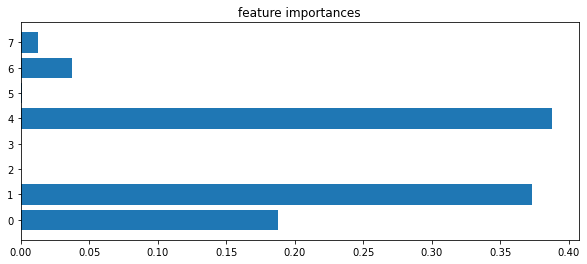

In [77]:
# Visualize feature importances.

plt.figure(figsize=(10, 4))
features = df.iloc[:,-1]
importances = model.feature_importances_
plt.title("feature importances")
plt.barh(range(8),importances[range(8)])

plt.show()



In [78]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
pred = model.predict(test_X)

print("Precision = ",precision_score(test_y, pred))
print("Recall = ",recall_score(test_y, pred))
print("Accuracy = ",accuracy_score(test_y, pred))
print("F1 Score =",f1_score(test_y, pred))



Precision =  0.9825783972125436
Recall =  0.9456740442655935
Accuracy =  0.9646666666666667
F1 Score = 0.9637730690362268


In [97]:
import numpy as np
import xgboost as xgb
data_train = xgb.DMatrix(data=train_X, label=train_y)
data_test = xgb.DMatrix(data=test_X, label=test_y)
for m in [2,3,4,5,6]:
    param = {'max_depth':m, 
         'eta':m, 
         'objective':'multi:softprob', 
        'min_child_weight':m,   
         'num_class':2,
        "eval_metric":"logloss"
            }
    model = xgb.train(param, data_train, m)
    preds = model.predict(data_test)
    print("Accuracy = ",accuracy_score(test_y,pred))
pred = np.asarray([np.argmax(line) for line in preds])
# Could not implement GridSearchCV due to the cpu usage and time limitations,
# However; xgboost seems pretty accurate with these parameters already.

Accuracy =  0.9793333333333333
Accuracy =  0.9793333333333333
Accuracy =  0.9793333333333333
Accuracy =  0.9793333333333333
Accuracy =  0.9793333333333333


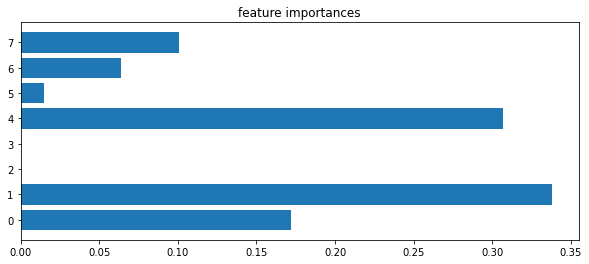

In [36]:

plt.figure(figsize=(10, 4))
features = df.iloc[:,-1]
importances = model.get_score(importance_type="gain")
plt.title("feature importances")

y=list(importances.values())
x=list(importances.keys())

y=[int(i)/sum(y) for i in y]
x=[int(i) for i in x]

plt.barh(x,y)
plt.show()

Precision =  0.9735054347826086
Recall =  0.9815068493150685
Accuracy =  0.9775967413441955
F1 Score = 0.9774897680763983


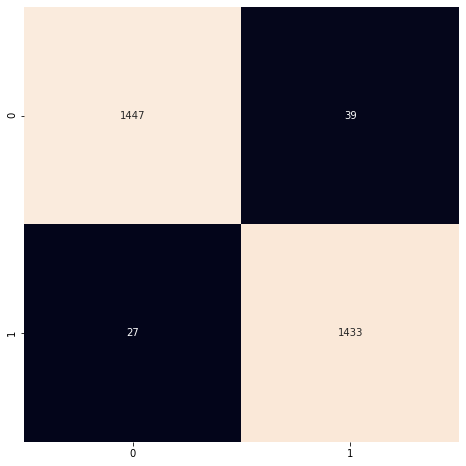

In [37]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import confusion_matrix

print("Precision = ",precision_score(test_y, pred))
print("Recall = ",recall_score(test_y, pred))
print("Accuracy = ",accuracy_score(test_y,pred))
print("F1 Score =",f1_score(test_y, pred))
plt.figure(figsize=(12, 8))
cm = confusion_matrix(test_y, pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False,fmt = ".0f")
